## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [3]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [51]:

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names

['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [8]:
x_train.shape[1:3]

(28, 28)

### 6. Verify if existing labels/Classes are correct 

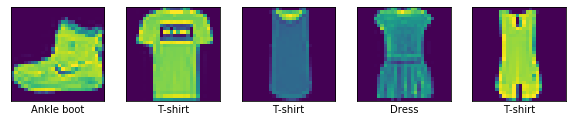

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
import numpy as np
x_train_scaled = np.subtract(x_train, np.min(x_train))/np.subtract(np.max(x_train),np.min(x_train))

In [19]:
np.max(x_train_scaled)

1.0

In [0]:
x_test_scaled = np.subtract(x_test, np.min(x_test))/np.subtract(np.max(x_test),np.min(x_test))

In [21]:
np.max(x_test_scaled)

1.0

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
x_train_reshape = tf.keras.backend.expand_dims(x_train_scaled, axis=-1)

In [0]:
x_test_reshape = tf.keras.backend.expand_dims(x_test_scaled, axis=-1)

In [23]:
x_train_reshape.shape

TensorShape([60000, 28, 28, 1])

In [25]:
x_test_reshape.shape

TensorShape([10000, 28, 28, 1])

###10. Import the necessary layers from keras to build the model

In [0]:
#import
from tensorflow.keras import models, layers

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = models.Sequential()

model.add(layers.Reshape((28,28,1),input_shape=(28,28,1)))

#normalize data
model.add(layers.BatchNormalization())


In [0]:
#Add first convolutional layer
model.add(layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Flatten the output
model.add(layers.Flatten())

In [0]:
#Dense layer
model.add(layers.Dense(128, activation='relu'))


#Output layer
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [34]:
#Train the model
model.fit(x_train_reshape,trainY,          
          validation_data=(x_test_reshape,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 227us/sample - loss: 0.3649 - accuracy: 0.8687 - val_loss: 0.3006 - val_accuracy: 0.8878
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2196 - accuracy: 0.9188 - val_loss: 0.2807 - val_accuracy: 0.9013
Epoch 3/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1514 - accuracy: 0.9446 - val_loss: 0.2672 - val_accuracy: 0.9097
Epoch 4/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0986 - accuracy: 0.9633 - val_loss: 0.2927 - val_accuracy: 0.9112
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0617 - accuracy: 0.9771 - val_loss: 0.3658 - val_accuracy: 0.9085
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0463 - accuracy: 0.9834 - val_loss: 0.4403 - val_accuracy: 0.9092
Epoch 7/10
60000/60000 [=========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = models.Sequential()

model2.add(layers.Reshape((28,28,1),input_shape=(28,28,1)))

#normalize data
model2.add(layers.BatchNormalization())


In [0]:
#Add first convolutional layer
model2.add(layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Add MaxPooling layer
model2.add(layers.MaxPool2D(pool_size=(2,2)))


#Add another dropout layer
model2.add(layers.Dropout(0.25))

In [0]:
#Flatten the output
model2.add(layers.Flatten())

In [0]:
#Dense layer
model2.add(layers.Dense(128, activation='relu'))


#Output layer
model2.add(layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

In [68]:
#Train the model
model2.fit(x_train_reshape,trainY,          
          validation_data=(x_test_reshape,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3761 - accuracy: 0.8640 - val_loss: 0.2780 - val_accuracy: 0.8999
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2435 - accuracy: 0.9106 - val_loss: 0.2542 - val_accuracy: 0.9108
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1973 - accuracy: 0.9268 - val_loss: 0.2233 - val_accuracy: 0.9220
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1639 - accuracy: 0.9381 - val_loss: 0.2195 - val_accuracy: 0.9221
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1397 - accuracy: 0.9474 - val_loss: 0.2538 - val_accuracy: 0.9128
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.1198 - accuracy: 0.9550 - val_loss: 0.2415 - val_accuracy: 0.9203
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [69]:
score = model2.evaluate(x_train_reshape, trainY, verbose=0)
print(score)

[0.03403697781777009, 0.9891833]


In [70]:
score = model2.evaluate(x_test_reshape, testY, verbose=0)
print(score)

[0.28309994943886996, 0.9241]


####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_reshape)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

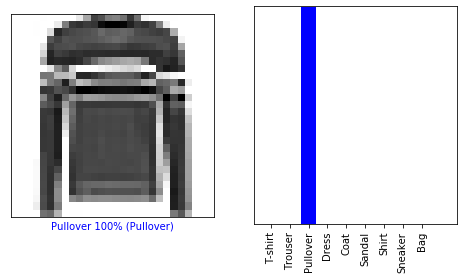

In [72]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [73]:
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train_reshape)
# fits the model on batches with real-time data augmentation:
model2.fit_generator(datagen.flow(x_train_reshape, trainY, batch_size=32),
                    steps_per_epoch=len(x_train_reshape) / 32, epochs=10)

  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7379 - accuracy: 0.7316
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5380 - accuracy: 0.8010
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4919 - accuracy: 0.8186
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4641 - accuracy: 0.8280
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4503 - accuracy: 0.8339
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4349 - accuracy: 0.8399
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4237 - accuracy: 0.8430
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4143 - accuracy: 0.8470
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4058 - accuracy: 0.8475
Epoch 10/10
1875/1

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

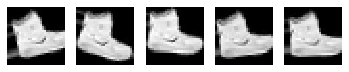

In [74]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshape[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()